In [ ]:
import numpy as np
import pandas as pd

import spacy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

spacy.cli.download("pt_core_news_sm")

imdb = pd.read_csv('/content/imdb-reviews-pt-br.csv')
imdb.head()

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
nlp = spacy.load('pt_core_news_sm')

texto = imdb.text_pt[0]

print('--------------')
print('Texto original')
print(texto)

doc = nlp(texto)
tokens_filtrado = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]

print('--------------')
print('Remoção de stopwords e pontuação')
print(tokens_filtrado)

lemmas = [token.lemma_.lower().strip() for token in tokens_filtrado]

print('--------------')
print('Lemmatization')
print(lemmas)

--------------
Texto original
Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar u

In [ ]:
# Criamos uma classe para gerenciar X e y
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Esta funcao remove espacos em branco no inicio e
# no fim do texto e converte todo o texto em letras
# minusculas
def clean_text(texto):     
    return texto.strip().lower()

# Esta funcao remove todas as stopwords e pontuacoes
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    return tokens

# Criamos um objeto CountVectorizer para vetorizar cada
# texto
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 

# Criamos um modelo SVM
classifier = SVC()

In [ ]:
# Separando em X e y
X = imdb.text_pt
y = imdb.sentiment

# Separando em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Construindo uma pipeline
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 3))
print(round(precision_score(y_test, y_pred, average='macro'), 3))
print(round(recall_score(y_test, y_pred, average='macro'), 3))

0.876
0.877
0.877


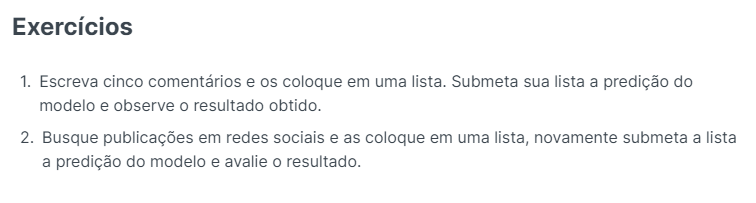

In [ ]:
comentarios = pd.Series(['O filme é simplesmente ruim, o que o senhor Cage tinha na cabeça ao aceitar este papel?', 
               'Uma obra de arte do começo ao fim. Em Pig vemos o melhor que Nicolas Cage pode fazer. Um ermitão solitário que nos ensina lições sobre como lidar com perdas e frustações em uma trama emocionante.',
               'ConAir é um dos clássicos dos filmes de ação com Nicolas Cage, John Cusack e Danny Trejo temos provavelmente o melhor filme de ação do ano.',
               'Wow. Simplesmente "wow". "Leaving Las Vegas" provavelmente é o melhor drama do ano. Atuação impecável por parte do senhor Cage. Elisabeth Shue sendo IMPLACÁVEL em frente as cameras.',
               '"Jiu-Jitsu" é medíocre. Sequer lutam jiu jitsu no filme. A ideia de "cair na porrada" com um alienigena já é ridícula por si só, ainda fazem questão de entregar um papel extremamente importante ao decadente Nicolas Cage. A verdadeira receita do fracasso.'])

y_pred_comentarios=pd.Series(['neg',
                    'pos',
                    'pos',
                    'pos',
                    'neg'])

In [ ]:
cometarios2 = ['O filme é bom, mas poderia ser melhor porque eu senti falta do espinossauro. A t rex poderia ter matado o espinossauro em vez do gigantossauro.',
               'Dira Paes, sempre espetacular, entregando a alma a este personagem pouco conhecido. Achei que o filme acelera um pouco nos momentos finais mas nada que comprometa a grandiosidade da obra.',
               'Canja de galinha e Sonic 2 não fazem mal a ninguém. Filme divertido e interessante para quem gosta do game. Piadas descontraida, personagens caricatos e um FBI para lá de diferente. Sessão da tarde para crianças e adultos.',
               'Nada de novo nessa sequencia, o diferente é só pelo fato de entrar outros personagens clássicos do vídeo game do mesmo nome, é uma boa diversão, mas somente isso.',
               'Filme arrastado, monotono , cansativo. Desde a metade do filme ficava orando pra acabar logo. Atores sem expressão, roteiro pessimo, o filme não consegue envolver o telespetador, me admira muito alguns críticos terem elogiado esse filme ridiculo. A unica coisa boa é a fotografia.',
               'Uma experiência incrível que só Robert Eggers poderia nos proporcionar. Um dos melhores filmes do ano até agora!',
               'Simplesmente horrível. Para quem tinha uma expectativa de ver um filme estilo Vikings ou Valhalla foi uma grande decepção.',
               '...O principal “defeito” de “Memórias de uma Gueixa” é recorrer ao idioma estadunidense para retratar uma história ambientada exclusivamente no Japão e enraizada nos seus mais profundos costumes e valores culturais.',
               'Eu Amo esse filme super fã,choro toda vez que vejo muito Romantico eu não sabia o que significava ser uma gueixa e ele me mostrou!! Quem não viu tem que ver!!! prepare os lenços rsrsrs']

y_pred_comentarios2=pd.Series(['neg', 
                              'pos', 
                              'pos', 
                              'neg', 
                              'neg',
                              'pos',
                              'neg',
                              'neg',
                              'pos'])

In [ ]:
y_pred = pipe.predict(comentarios)

print(round(accuracy_score(y_pred_comentarios, y_pred), 3))
print(round(precision_score(y_pred_comentarios, y_pred, average='macro'), 3))
print(round(recall_score(y_pred_comentarios, y_pred, average='macro'), 3))

1.0
1.0
1.0


In [ ]:
y_pred = pipe.predict(cometarios2)

print(round(accuracy_score(y_pred_comentarios2, y_pred), 3))
print(round(precision_score(y_pred_comentarios2, y_pred, average='macro'), 3))
print(round(recall_score(y_pred_comentarios2, y_pred, average='macro'), 3))

0.778
0.833
0.8
